# FRAUD DETECTION

This notebook should help you get started with any competition on Zindi. In it we cover:
- Loading the data
- Simple EDA and an example of feature enginnering

# Setup

Load the data into the notebook.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

##Supress warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## Load the client training dataset

In [2]:
client_train = pd.read_csv('client_train.csv')
client_train.head(5)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


.
.

## Check the shape of the client  training dataset

In [3]:
client_train.shape

(135493, 6)

## Load the client testing dataset

In [4]:
client_test = pd.read_csv('client_test.csv')
client_test['client_id']

0           test_Client_0
1           test_Client_1
2          test_Client_10
3         test_Client_100
4        test_Client_1000
               ...       
58064    test_Client_9995
58065    test_Client_9996
58066    test_Client_9997
58067    test_Client_9998
58068    test_Client_9999
Name: client_id, Length: 58069, dtype: object

.
.

## Check the shape of the client  training dataset

In [5]:
client_test.shape

(58069, 5)

.
## Load the invoice training dataset

In [6]:
invoice_train = pd.read_csv('invoice_train.csv')
invoice_train.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


.
.
## Check the shape of the invoice training dataset

In [7]:
invoice_train.shape

(4476749, 16)

.
.
## Load the invoice testing dataset

In [8]:
invoice_test = pd.read_csv('invoice_test.csv')
invoice_test.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


.
.
## Check the shape of the invoice testing dataset

In [9]:
invoice_test.shape

(1939730, 16)

## Take a look at the sample submission

In [10]:
SampleSubmission = pd.read_csv('SampleSubmission.csv')
SampleSubmission.head(5)

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046



# . 

# Missing values
Let's check if there's any missing values in our data.

In [11]:
client_train.isnull().sum() 

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [12]:
client_test.isnull().sum() 

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
dtype: int64

In [13]:
invoice_train.isnull().sum() 

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [14]:
invoice_test.isnull().sum() 

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

# Combining the data sets

In [15]:
new_df = invoice_train.merge(client_train, left_on='client_id', right_on='client_id',
          suffixes=('', None))
new_df_test = invoice_test.merge(client_test, left_on='client_id', right_on='client_id',
          suffixes=('', None))

# Drop duplicates
new_df = new_df.drop_duplicates(subset=["client_id"])
new_df_test = new_df_test.drop_duplicates(subset=["client_id"])
new_df['client_id']

0              train_Client_0
35             train_Client_1
72            train_Client_10
90           train_Client_100
110         train_Client_1000
                  ...        
4476596    train_Client_99995
4476667    train_Client_99996
4476708    train_Client_99997
4476744    train_Client_99998
4476746    train_Client_99999
Name: client_id, Length: 135493, dtype: object

In [16]:
new_df_test.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'disrict', 'client_catg',
       'region', 'creation_date'],
      dtype='object')

In [17]:
new_df.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'disrict', 'client_catg',
       'region', 'creation_date', 'target'],
      dtype='object')

## Check for NaN values to make sure everything went well

In [18]:
new_df.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
disrict                 0
client_catg             0
region                  0
creation_date           0
target                  0
dtype: int64

# .
# EDA + Feature Engineering

<AxesSubplot:>

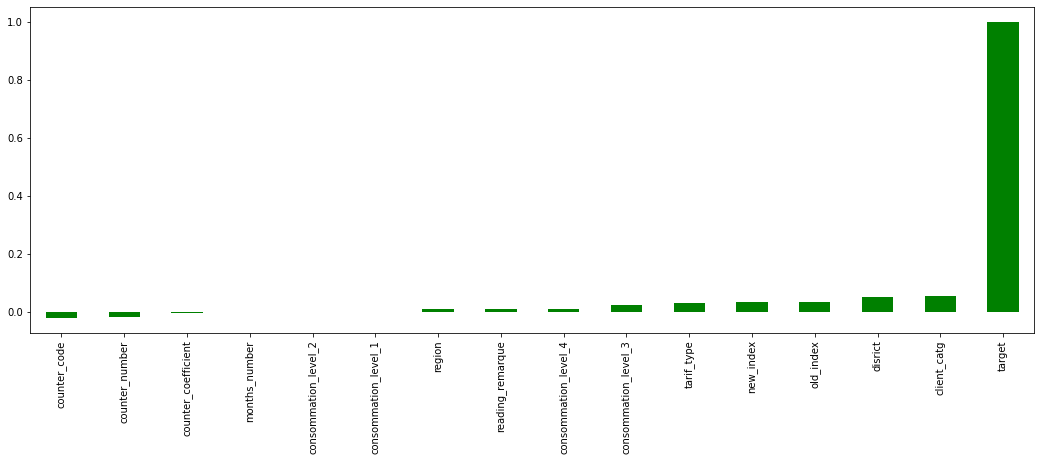

In [19]:
# Look at correlation with target
new_df.corr()['target'].sort_values().plot(kind='bar', color ='g', figsize=(18, 6))


.


## Take a look at the correlation between the variables

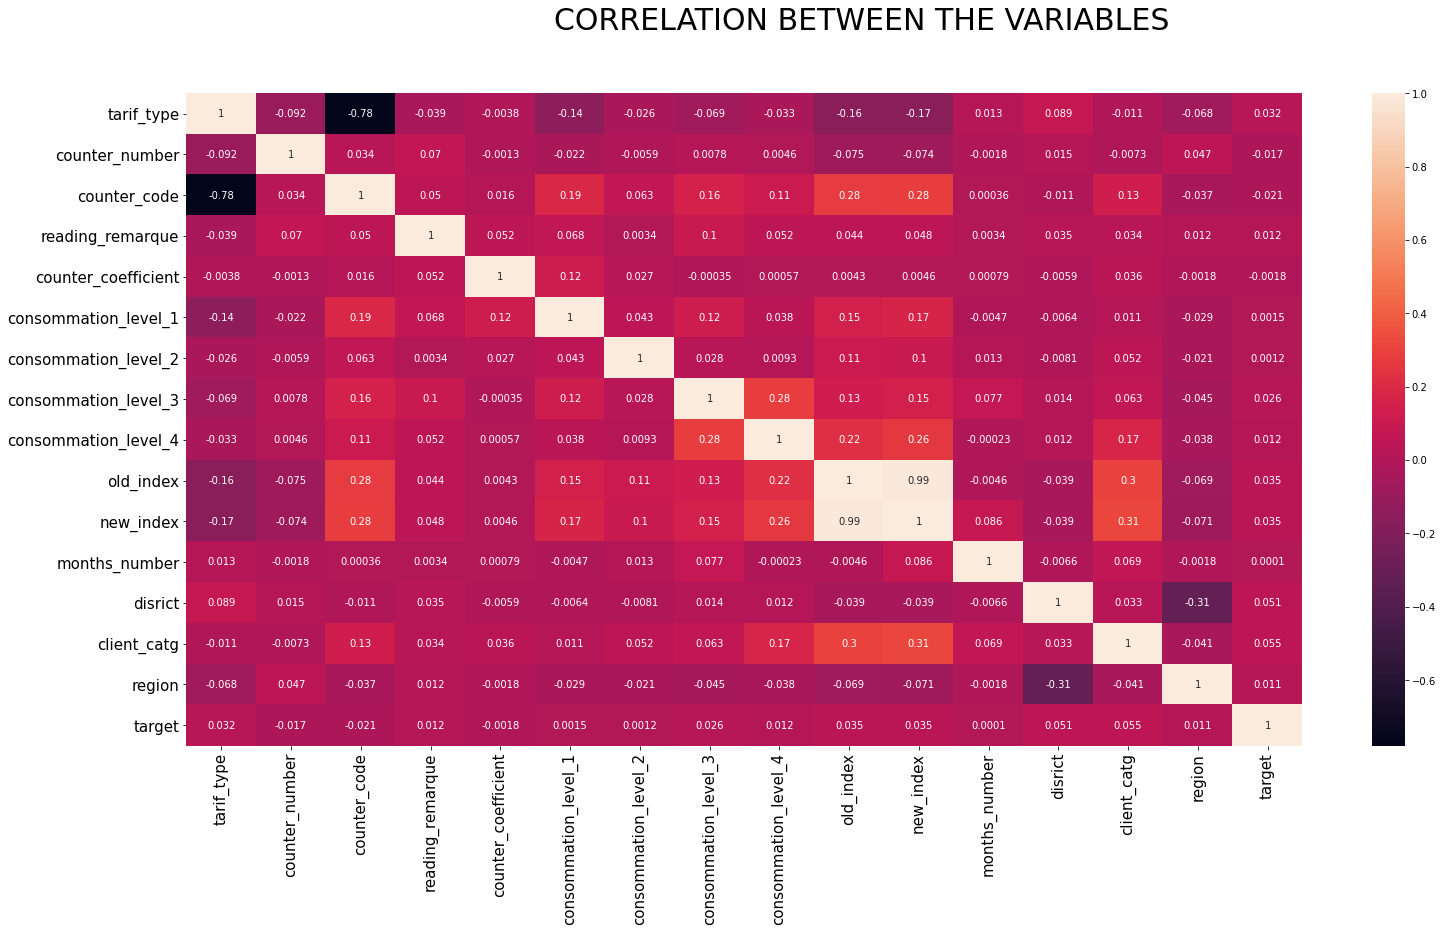

In [20]:
Correlation  = new_df.corr(method = 'pearson')

plt.figure(figsize=(25,12))
sns.heatmap(Correlation, annot=True)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.suptitle("CORRELATION BETWEEN THE VARIABLES", fontsize = 30)
plt.show()

From the correlation heatmap, we observe that the avariables (old index and new index) are strongly correlated.Putting features that are highly correlated to a model brings the problem of collinearity and could lower the performance of a model. You can decide to train one model with all the features, and then another with only the poorly correlated features and compare their accuracy.

In [21]:
new_df.info()
new_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135493 entries, 0 to 4476746
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             135493 non-null  object 
 1   invoice_date          135493 non-null  object 
 2   tarif_type            135493 non-null  int64  
 3   counter_number        135493 non-null  int64  
 4   counter_statue        135493 non-null  object 
 5   counter_code          135493 non-null  int64  
 6   reading_remarque      135493 non-null  int64  
 7   counter_coefficient   135493 non-null  int64  
 8   consommation_level_1  135493 non-null  int64  
 9   consommation_level_2  135493 non-null  int64  
 10  consommation_level_3  135493 non-null  int64  
 11  consommation_level_4  135493 non-null  int64  
 12  old_index             135493 non-null  int64  
 13  new_index             135493 non-null  int64  
 14  months_number         135493 non-null  int64  
 15 

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
35,train_Client_1,2010-09-02,11,678902,0,203,8,1,388,0,...,0,11429,11817,2,ELEC,69,11,107,29/05/2002,0.0
72,train_Client_10,2010-02-15,11,572765,0,203,8,1,407,0,...,0,31955,32362,4,ELEC,62,11,301,13/03/1986,0.0
90,train_Client_100,2009-10-22,11,2078,0,413,6,1,0,0,...,0,98,98,4,ELEC,69,11,105,11/07/1996,0.0
110,train_Client_1000,2015-02-13,11,19575,0,207,9,1,800,159,...,0,0,959,4,ELEC,62,11,303,14/10/2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476596,train_Client_99995,2005-07-10,11,897286,0,207,6,1,0,0,...,0,14,14,4,ELEC,62,11,304,26/07/2004,0.0
4476667,train_Client_99996,2015-10-20,11,398783,0,207,9,1,605,0,...,0,895,1500,4,ELEC,63,11,311,25/10/2012,0.0
4476708,train_Client_99997,2015-08-06,11,262195,0,207,9,1,280,0,...,0,3573,3853,4,ELEC,63,11,311,22/11/2011,0.0
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,...,0,3197,3732,8,ELEC,60,11,101,22/12/1993,0.0


## Simple Feature engineering

#### Trend of of electricty fraud, based off of the month of joining 

<AxesSubplot:xlabel='joining_month'>

<Figure size 1440x1080 with 0 Axes>

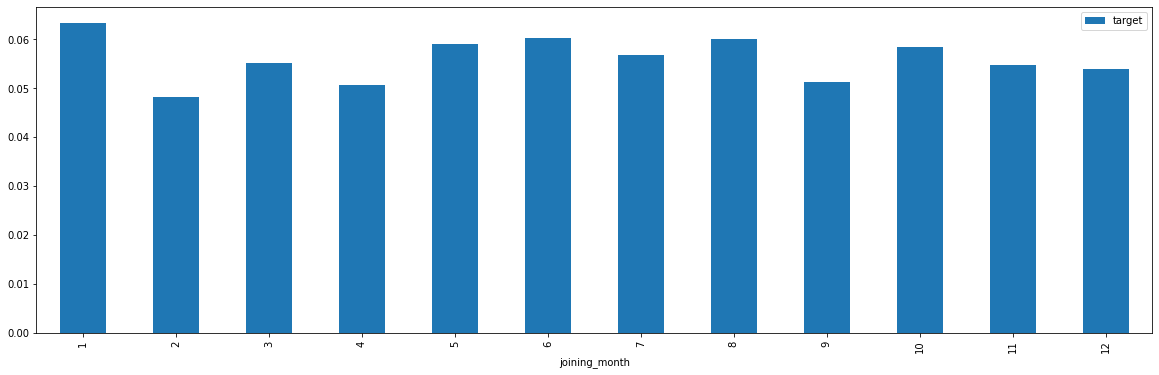

In [22]:

new_df['creation_date'] = pd.to_datetime(new_df['creation_date'])
new_df_test['creation_date'] = pd.to_datetime(new_df_test['creation_date'])

# Date variables
new_df_test['joining_month'] = new_df_test['creation_date'].dt.month
new_df_test['joining_year'] = new_df_test['creation_date'].dt.year

new_df['joining_month'] = new_df['creation_date'].dt.month
new_df['joining_year'] = new_df['creation_date'].dt.year


plt.figure(figsize = (20, 15))
new_df.groupby('joining_month').mean().reset_index().plot(y='target', x='joining_month', kind='bar', figsize = (20,6))

In [23]:
new_df

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target,joining_month,joining_year
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,14384,4,ELEC,60,11,101,1994-12-31,0.0,12,1994
35,train_Client_1,2010-09-02,11,678902,0,203,8,1,388,0,...,11817,2,ELEC,69,11,107,2002-05-29,0.0,5,2002
72,train_Client_10,2010-02-15,11,572765,0,203,8,1,407,0,...,32362,4,ELEC,62,11,301,1986-03-13,0.0,3,1986
90,train_Client_100,2009-10-22,11,2078,0,413,6,1,0,0,...,98,4,ELEC,69,11,105,1996-11-07,0.0,11,1996
110,train_Client_1000,2015-02-13,11,19575,0,207,9,1,800,159,...,959,4,ELEC,62,11,303,2014-10-14,0.0,10,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476596,train_Client_99995,2005-07-10,11,897286,0,207,6,1,0,0,...,14,4,ELEC,62,11,304,2004-07-26,0.0,7,2004
4476667,train_Client_99996,2015-10-20,11,398783,0,207,9,1,605,0,...,1500,4,ELEC,63,11,311,2012-10-25,0.0,10,2012
4476708,train_Client_99997,2015-08-06,11,262195,0,207,9,1,280,0,...,3853,4,ELEC,63,11,311,2011-11-22,0.0,11,2011
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,...,3732,8,ELEC,60,11,101,1993-12-22,0.0,12,1993


## Trend of of electricty fraud, based off of the year of joining 

<AxesSubplot:xlabel='joining_year'>

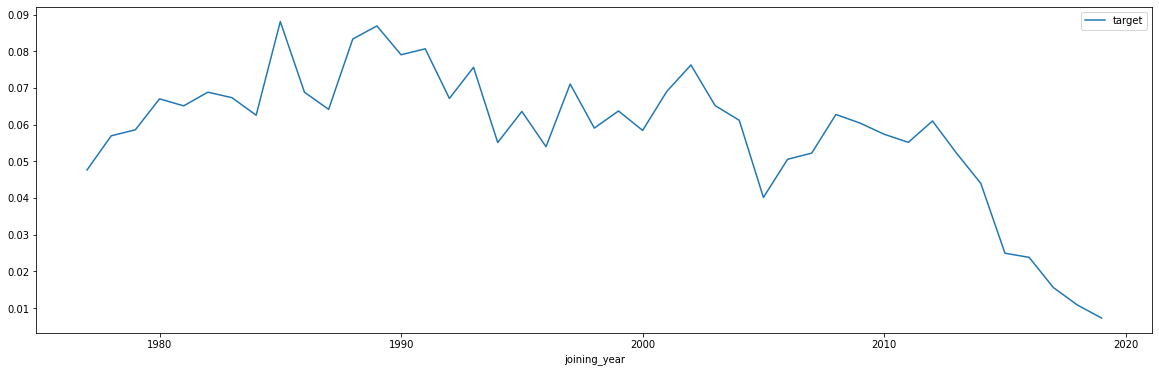

In [24]:
new_df.groupby('joining_year').mean().reset_index().plot(y='target', x='joining_year',figsize = (20,6))

## You can do more!!!

You can continue to look at different features and make visualizations that would allow yoiu to better understand the data

# Model Evaluation

We already have split datasets, so no need of splitting them more.

And since the target has a high correlation with each independent variable, we shall incorporate all.

## Convert objects and datetime to numerical for regression to work

In [25]:

y_train = new_df['target']
X_train = new_df[['tarif_type', 'counter_number',
        'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number',  'disrict', 'client_catg',
       'region', 'joining_month', 'joining_year']]



X_test = new_df_test[['tarif_type', 'counter_number',
        'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number',  'disrict', 'client_catg',
       'region', 'joining_month', 'joining_year']]


Lets test model on our model

In [27]:
# scores = []
# dicts = {}
# for i in range(1,200,5):
#     rf_classifier = RandomForestClassifier(n_estimators = i, random_state=0)
#     rf_classifier.fit(X_train, y_train)
#     rf_Pred = rf_classifier.predict(X_train)
#     score_ = accuracy_score(y_train,rf_Pred)
#     print(i, " optimal score: ",score_)
#     scores.append(score_)


In [28]:
# print(min(scores))

In [29]:
# Get optimal values for KNN
# k_range = range(1, 200)
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn.fit(X_train, y_train)
#     y_test = knn.predict(X_test)
#     scores.append(knn.score(X_test, y_test))
# plt.figure()
# plt.xlabel('k')
# plt.ylabel('accuracy')
# plt.scatter(k_range, scores)
# plt.xticks([0,5,10,15,20])

In [33]:

# create array of models to evaluate
models = []
models.append(('LoR',LogisticRegression()))
models.append(('Dec_Tree',DecisionTreeClassifier(max_depth=5, random_state=0)))
models.append(('KNN',KNeighborsClassifier(n_neighbors = 10)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('GaussianNB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('R_Forest',RandomForestClassifier(n_estimators = 190, random_state=0)))

files = []
names = []
list_of_lists = []
predictions =[]
scores = []

for name,model in models:
    model.fit(X_train,y_train)
    
    pred_name = "y" + name
    
    pred_name = model.predict(X_test)
    
    
    ss = pd.DataFrame()
    ss['client_id'] = new_df_test['client_id']
    ss['target'] = pred_name 
    ss.to_csv(name + ".csv",index=False)
        
    names.append(name)
    predictions.append(pred_name)

list_of_lists.append(predictions)
list_of_lists.append(names)

Learning rate set to 0.083804
0:	learn: 0.5930103	total: 104ms	remaining: 1m 43s
100:	learn: 0.1823721	total: 5.43s	remaining: 48.3s
200:	learn: 0.1686623	total: 11.2s	remaining: 44.6s
300:	learn: 0.1566846	total: 17s	remaining: 39.6s
400:	learn: 0.1464819	total: 22.8s	remaining: 34s
500:	learn: 0.1386302	total: 28.5s	remaining: 28.3s
600:	learn: 0.1307671	total: 34.1s	remaining: 22.7s
700:	learn: 0.1227585	total: 39.9s	remaining: 17s
800:	learn: 0.1163452	total: 45.6s	remaining: 11.3s
900:	learn: 0.1104010	total: 51.3s	remaining: 5.64s
999:	learn: 0.1049441	total: 56.9s	remaining: 0us


##  After submitting to Zindi, the scores:

Logistic Regression : 0.5

Decision Tree: 0.531734771688113

KNN: 0.50214540863999


Linear Discriminant Analysis: 0.500871236158714


Gaussian : 0.5

Random Forest : 0.503808680471835

SVM : 0.5

## Let's use a boosting Algorithm

In [34]:
model = CatBoostClassifier(iterations = 100,learning_rate = 1, depth = 2,metric_period=100)
model = model.fit(X_train,y_train)
pred_y = model.predict(X_test)

ss_split = pd.DataFrame()
ss_split['client_id'] = new_df_test['client_id']
ss_split['target'] = pred_y 
ss_split.to_csv("Catboost" + ".csv",index=False)

0:	learn: 0.2555857	total: 9.33ms	remaining: 924ms
99:	learn: 0.1956777	total: 651ms	remaining: 0us


# Let's split our dataset into train and test our models with test and train splits

In [35]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.33,random_state=42)

In [ ]:
# Repeat same thing now evaluating our models
models = []
models.append(('LoR_split',LogisticRegression()))
models.append(('Dec_Tree_split',DecisionTreeClassifier(max_depth=5, random_state=0)))
models.append(('KNN_split',KNeighborsClassifier(n_neighbors = 10)))
models.append(('LDA_split',LinearDiscriminantAnalysis()))
models.append(('GaussianNB_split',GaussianNB()))
models.append(('SVM_split',SVC()))
models.append(('R_Forest_split',RandomForestClassifier(n_estimators = 190, random_state=0)))
# Boost our models
models.append(('CatBoost',CatBoostClassifier(depth=10,metric_period=100)))

files = []
names = []
list_of_lists = []
predictions =[]
scores = []

for name,model in models:
    model.fit(X_train_split,y_train_split)
    
    pred_name = "y" + name
    
    pred_name = model.predict(X_test_split)
    
    # evaluate model
    print(name, mean_absolute_error(y_test_split,pred_name))
    
        
    names.append(name)
    predictions.append(pred_name)

list_of_lists.append(predictions)
list_of_lists.append(names)

LoR_split 0.057052758705521886
Dec_Tree_split 0.05723167758817346
KNN_split 0.057119853286516226
LDA_split 0.057701339655133854
GaussianNB_split 0.057052758705521886


## Let's boost our models with Catboost

In [36]:
# model = CatBoostClassifier(metric_period = 100)
# model = model.fit(X_train_split,y_train_split)
# pred_y = model.fit(X_test_split)

# # evaluate model
# print("Catboost", mean_absolute_error(y_test,pred_y))

Learning rate set to 0.070631
0:	learn: 0.6083967	total: 19.4ms	remaining: 19.3s
100:	learn: 0.1939066	total: 1.05s	remaining: 9.35s
200:	learn: 0.1884074	total: 2.08s	remaining: 8.26s
300:	learn: 0.1843463	total: 3.43s	remaining: 7.96s
400:	learn: 0.1810335	total: 4.67s	remaining: 6.97s
500:	learn: 0.1778750	total: 5.71s	remaining: 5.69s
600:	learn: 0.1750215	total: 6.8s	remaining: 4.51s
700:	learn: 0.1721286	total: 8.03s	remaining: 3.43s
800:	learn: 0.1695344	total: 9.17s	remaining: 2.28s
900:	learn: 0.1667569	total: 10.3s	remaining: 1.14s
999:	learn: 0.1644007	total: 11.4s	remaining: 0us


CatBoostError: y may be None only when X is an instance of catboost.Pool or string

## You can do more !
#### More Boosting Algorithms e.g XgBoost, AdaBoost
#### More Ensembles i.e Voting, Gradient Boosting

In [ ]:
# Voting Ensemble
